In [75]:
#I Choose Thomas Assignemnt
from selenium import webdriver
from selenium.webdriver.common.by import By
import collections
import pandas as pd


#Part 1
class Post():
    def __init__(self, id, title, score, subreddit):
        self.id = id
        self.title = title
        self.score = score
        self.subreddit = subreddit

    def __str__(self):
        return "{}, {}, {}, {}".format(self.id, self.title, self.score, self.subreddit)



def reddit_top_posts(url_amount=100):
    results = []
    while (len(results) < url_amount):
        links = browser.find_elements_by_css_selector('#siteTable>div.link')
        for link in links:
            _id = link.get_property('id')
            title = link.find_element_by_xpath(".//a[contains(@class, 'title')]").text
            score = link.get_attribute('data-score')
            subreddit = link.get_attribute('data-subreddit')
            results.append(Post(_id, title, score, subreddit))
        browser.find_element_by_class_name('next-button').click()
    return results

browser = webdriver.Firefox(executable_path=r'/home/mkl/geckodriver')
browser.get('https://old.reddit.com/top/?sort=top&t=all')

first = reddit_top_posts()

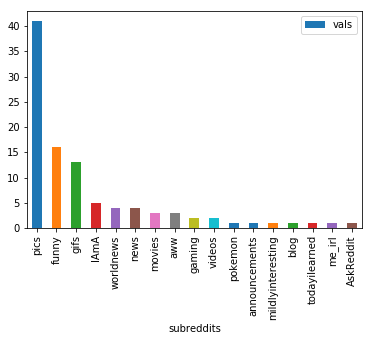

In [60]:
#Part 2
def frequency_subreddits(results):
    freq = {}
    for res in results:
        if res.subreddit in freq:
            freq[res.subreddit] += 1
        else:
            freq[res.subreddit] = 1
    sorted_tuplets = sorted(freq.items(), key= lambda kv: kv[1], reverse=True)
    sorted_dict = collections.OrderedDict(sorted_tuplets)
    return sorted_dict
    

sorted_dict = dict(frequency_subreddits(first))
keys = []
values = []
for x in sorted_dict.keys():
    keys.append(x)
for x in sorted_dict.values():
    values.append(x)
freq_chart = pd.DataFrame({'subreddits':keys, 'vals':values})
freq_chart.plot.bar(x='subreddits', y='vals')


In [76]:
#Part 3
def search_reddit(search_term, n):
    #search in bar
    search_bar = browser.find_element_by_name("q")
    search_bar.send_keys(search_term)
    search_bar.submit()
    browser.implicitly_wait(3)
    
    posts = []
    
    while(len(posts) < n):
        contents = browser.find_elements_by_class_name('contents')
        search_results = contents[1].find_elements_by_class_name('search-result')
        for search_result in search_results:
            if(len(posts)+1 > n):
                break
            #create posts
            link_header = search_result.find_element_by_class_name('search-result-header')
            title = link_header.text
            score = search_result.find_element_by_class_name('search-score').text
            subreddit = search_result.find_element_by_class_name('search-subreddit-link').text
            id = None
            posts.append(Post(id, title, score, subreddit))
        browser.find_element_by_css_selector('.nav-buttons .nextprev a').click()
    return posts

print(len(search_reddit('bob', 4)))

4
